## Student Performance Indicator

Life cycle of machine learning project

- understanding the problem statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

1) Problem statement
- this project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

2) Data Collection
- dataset source -  https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977

### 2.1 Import Data and Required Packages
Importing Pandas, Numpy, Matplotlib, Seaborn and Warnings Library.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


Import the CSV Data as pandas DataFrame

In [2]:
df = pd.read_csv('data/stud.csv')

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


shape of dataset

In [4]:
df.shape

(1000, 8)

### 2.2 Dataset information
- gender: sex of student -> (male/female)
- race/ethnicity: ethnicity of students -> (group A, B, C, D, E)
- parental level of education: parent's final education -> (bachelor's degree, some college, master's degree, associate's degree, high school)
- lunch: having lunch before test (standard or free/reduced)
- test preparation course: complete or not complete before test
- math score
- reading score
- writing score


### 3 Data Checks to perform
- check missing values
- check duplicates
- check data type
- check the number of unique values of each column
- check statistics of data set
- check various categories present in the different categorical column

### 3.1 Check Missing Values

In [5]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

there are no missing values in the dataset

### 3.2 Check Duplicate

In [6]:
df.duplicated().sum()

np.int64(0)

### 3.3 Check data types

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4 Checking the number of unique values of each column

In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### 3.5 check the statistics of dataset

In [9]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


##### insight
- from above description of numerical data all means are very close to each other - between 66 and 68.05;
- All standard deviations are also close - between 14.6 and 15.19;
- While there is a minimum score 0 for math,for writing it is 10 and for reading the minimum score is 17;

### 3.7 Exploratory Data Analysis

In [10]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
#getting unique values in categories columns
print("Categories in 'gender' variable: ",end="")
print(df['gender'].unique())
print("categories in 'race-ethnicity' variable: ",end="")
print(df['race_ethnicity'].unique())
print('categories in parental level of education variable: ', end="")
print(df['parental_level_of_education'].unique())
print('categories in lunch variable: ',end="")
print(df['lunch'].unique())
print(df['lunch'].unique())
print("categories in test preparation course variable: ", end="")
print(df['test_preparation_course'].unique())


Categories in 'gender' variable: ['female' 'male']
categories in 'race-ethnicity' variable: ['group B' 'group C' 'group A' 'group D' 'group E']
categories in parental level of education variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in lunch variable: ['standard' 'free/reduced']
['standard' 'free/reduced']
categories in test preparation course variable: ['none' 'completed']


In [12]:
#define numerical and categorical columns
numeric_features=[feature for feature in df.columns if df[feature].dtype !='O']
categorical_features = [feature for feature in df.columns if df[feature].dtype =='O']

#printing columns
print('we have {} numerical features: {}'.format(len(numeric_features),numeric_features))
print('we have {} categorical features: {}'.format(len(categorical_features),categorical_features))

we have 3 numerical features: ['math_score', 'reading_score', 'writing_score']
we have 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### 3.8 Adding columns for TOTAL-SCORE and AVERAGE

In [13]:
df['total_score'] = df['math_score']+df['writing_score']+df['reading_score']
df['average'] = df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [14]:
#getting the number of students with full marks in maths, reading and writing
maths_full = df[df['math_score']==100]['average'].count()
reading_full = df[df['reading_score']==100]['average'].count()
writing_full = df[df['writing_score']==100]['average'].count()
print(f"Number of students with full marks in math: {maths_full}")
print(f"Number of students with full marks in reading: {reading_full}")
print(f"Number of students with full marks in writing: {writing_full}")

Number of students with full marks in math: 7
Number of students with full marks in reading: 17
Number of students with full marks in writing: 14


In [15]:
#getting the number of students with less than 20 marks in maths, reading and writing
maths_less_20 = df[df['math_score']<=20]['average'].count()
reading_less_20 = df[df['reading_score']<=20]['average'].count()
writing_less_20 = df[df['writing_score']<=20]['average'].count()

print(f"Number of students getting less than 20 in Math: {maths_less_20}")
print(f"Number of students getting less than 20 in Reading: {reading_less_20}")
print(f"Number of students getting less than 20 in Writing: {writing_less_20}")


Number of students getting less than 20 in Math: 4
Number of students getting less than 20 in Reading: 1
Number of students getting less than 20 in Writing: 3


#### Insight
- From above values we can assume the students are not performing good in maths
- Best performing is the Reading

### Exploring Data (Visualizaton)
#### 4.1 Visualize average score distribution to make some conclusion.
- Histogram
- Kernel Distribution Function (KDE)

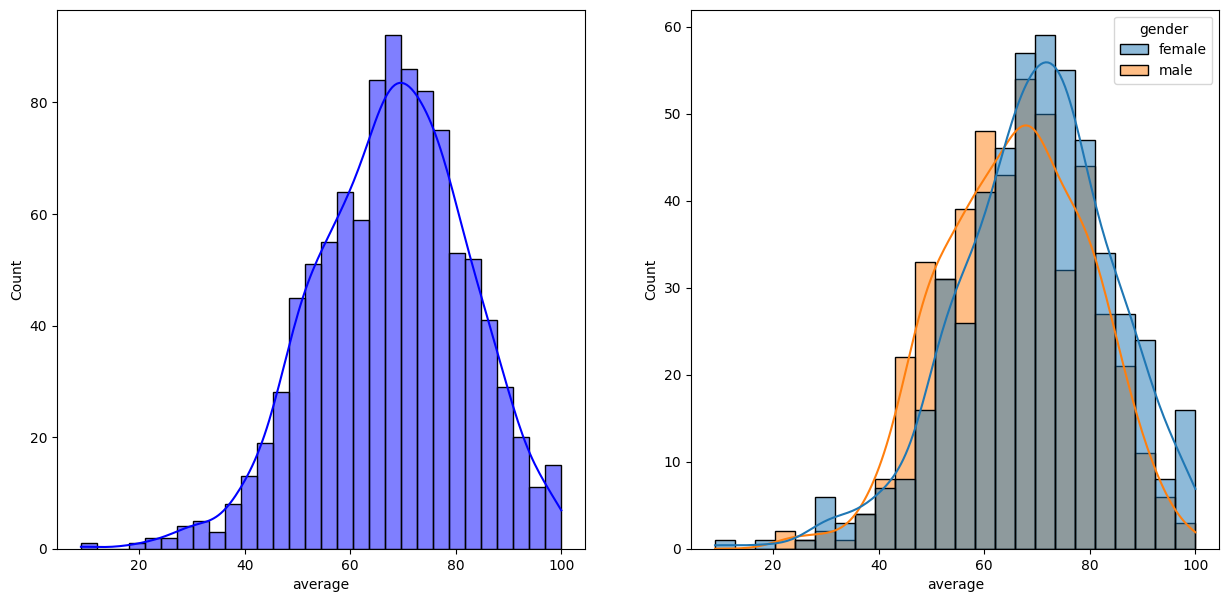

In [16]:
fig, axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='b')
plt.subplot(122)
sns.histplot(df,x='average',kde=True,hue='gender')
plt.show()

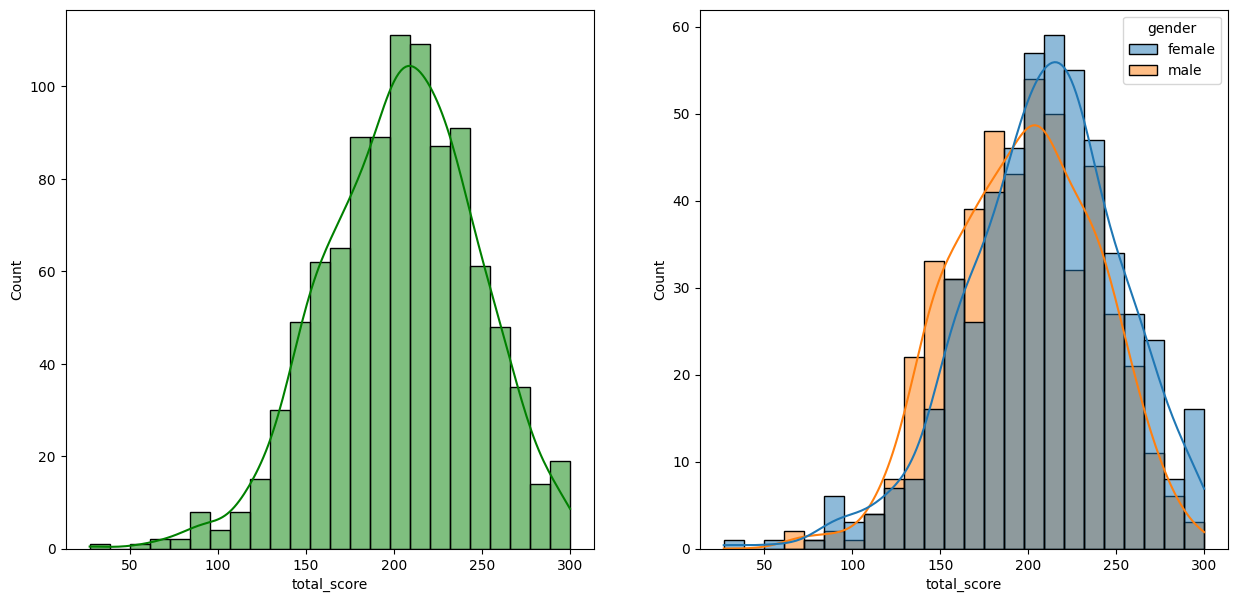

In [17]:
fig, axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(df,x='total_score',kde=True,color='g')
plt.subplot(122)
sns.histplot(df,x='total_score',kde=True,hue="gender")
plt.show()

#### Insight
- from the first plot we can understand the females are scoring more than males


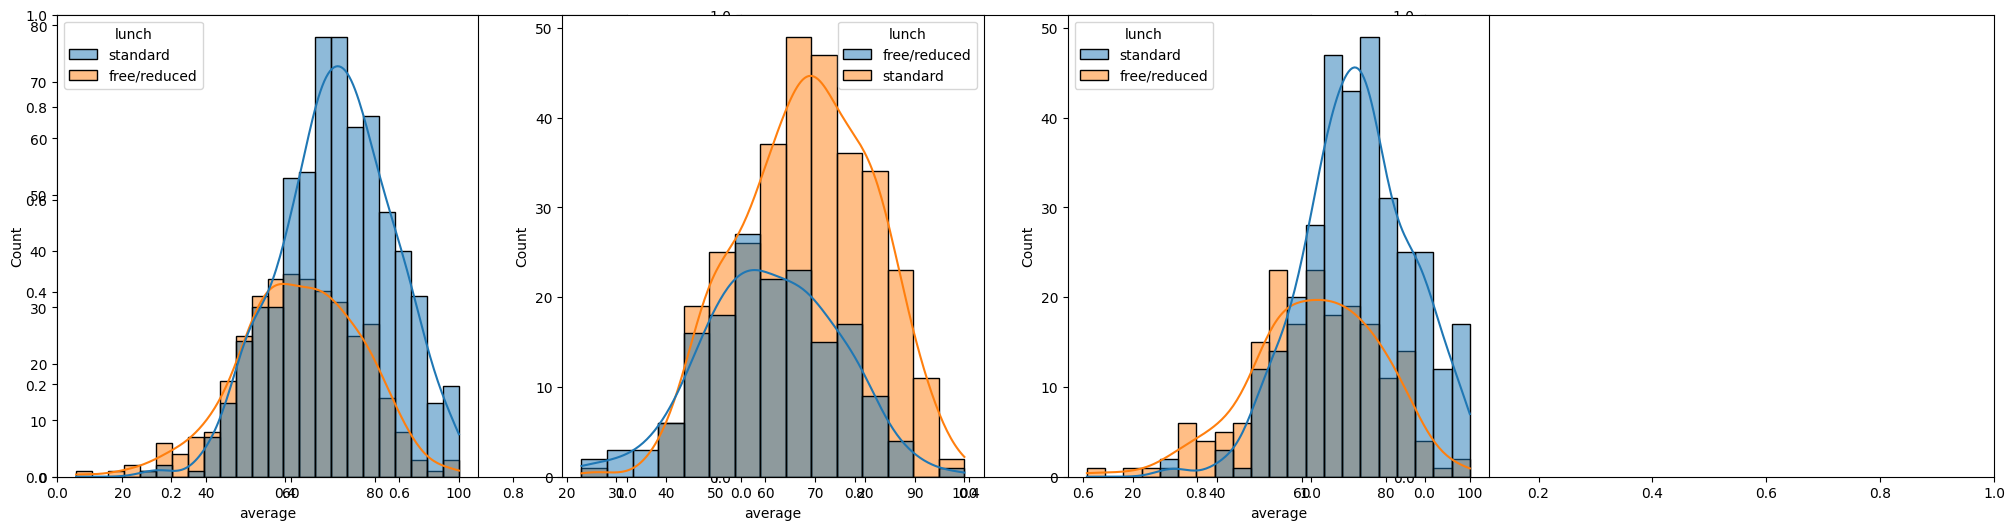

In [18]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue="lunch")
plt.subplot(142)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.show()

#### insight
- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams be it a male or a female

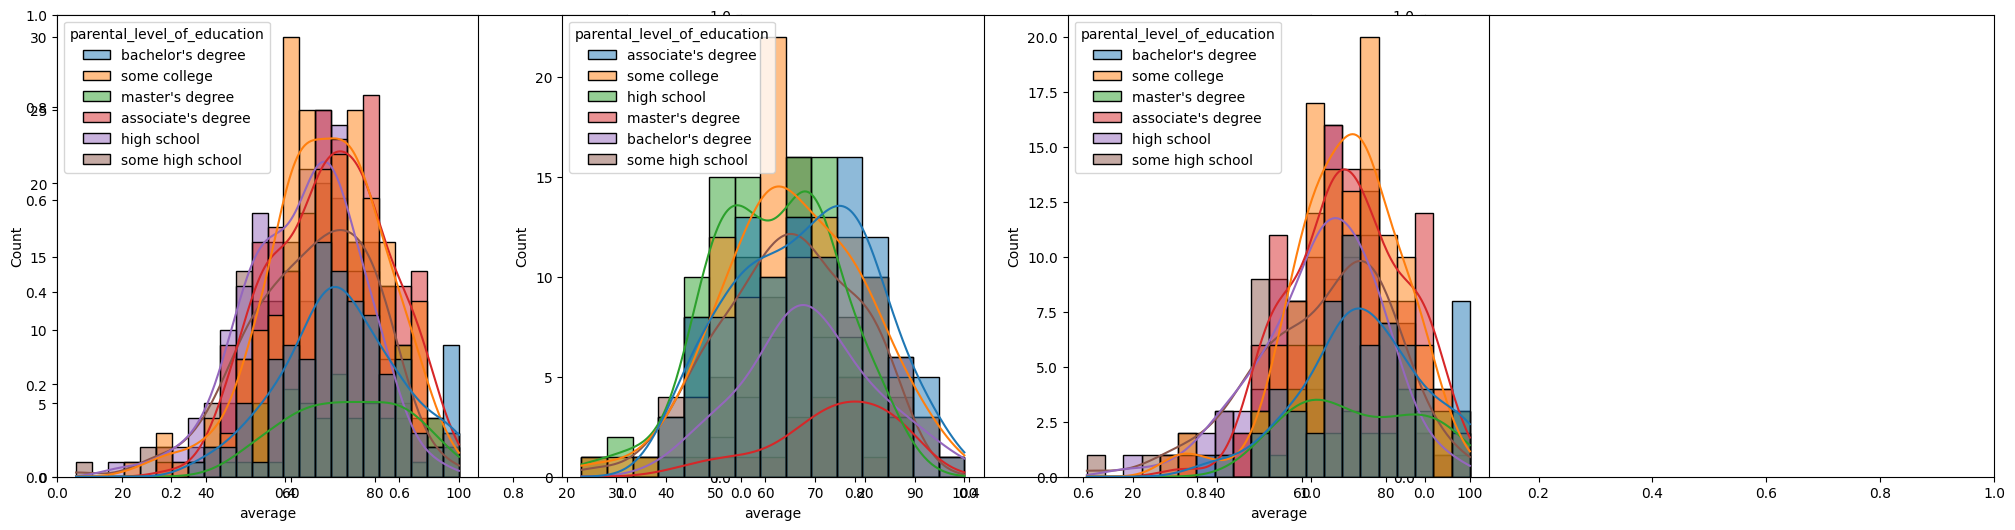

In [19]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax=sns.histplot(df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax = sns.histplot(df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

#### insight
- in general parent's education doesn't help student perform well in exam.
- 2nd plot show that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam.
- 3rd plot we can see there is no effect of parent's education on female students.

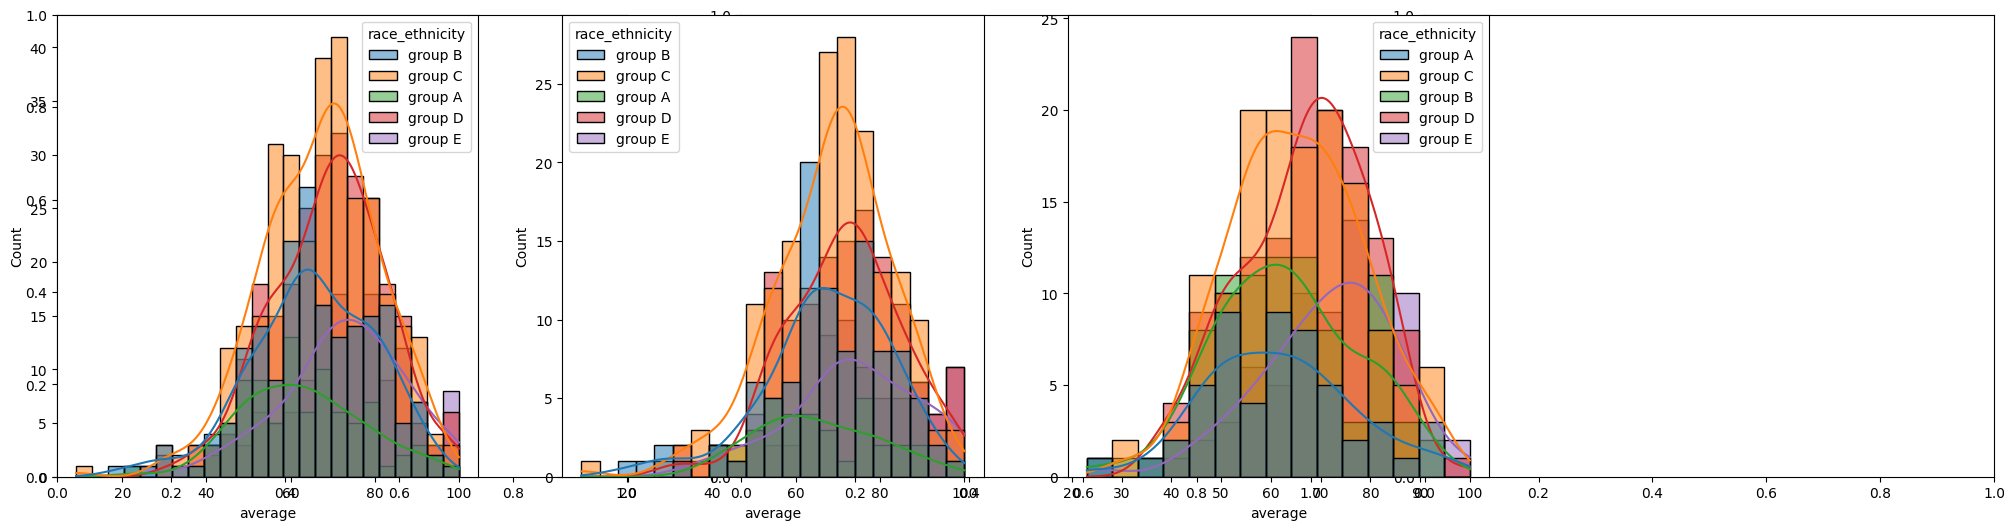

In [22]:

plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

#### insight
- student of group A and group B tends to perform poorly in exam.

### 4.2 Maximum score of students in all three subjects

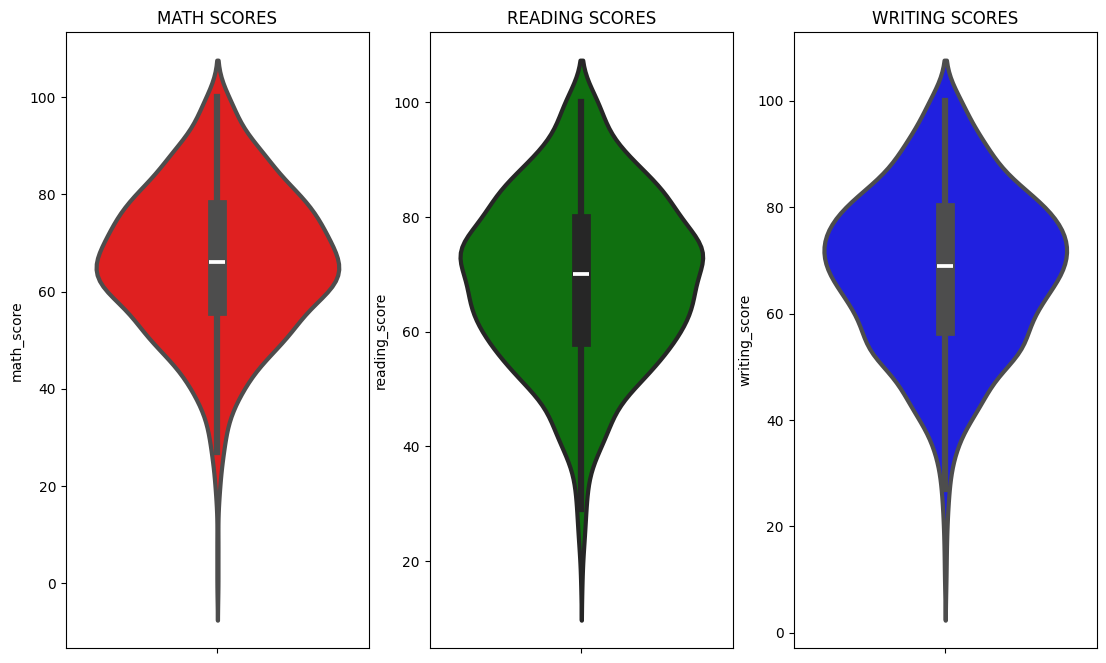

In [25]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

#### insight
- from the above three plots it is clearly visible that most of the students score between 60-80 in maths whereas in reading and writing most of them score from 50-80

### Multivariate analysis using pieplot

In [ ]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race-Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()